In [ ]:
# 191805043 / Rabia Yıldırım

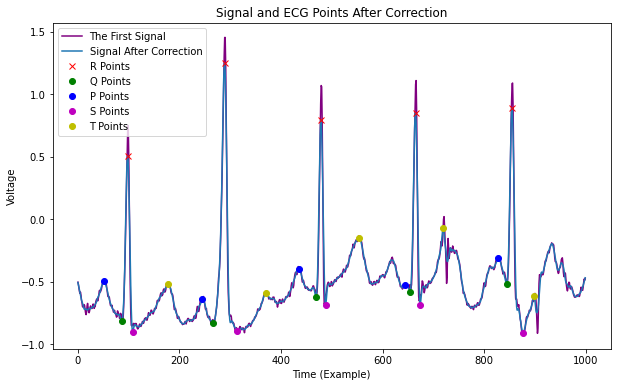

PQ: 0.09444444444444444 QR: 0.03333333333333333 RS: 0.02777777777777778 ST: 0.19444444444444445 PT: 0.35000000000000003
PP: 0.5361111111111111 QQ: 0.5 TP: 0.18611111111111112


In [3]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import savgol_filter
from scipy.misc import electrocardiogram

# Receiving an ECG Signal
ecg = electrocardiogram()

#sampling frequency 360Hz
fs = 360

# Reception of A Certain December of the Signal
lower = 18000
upper = 19000
x = ecg[lower:upper]

# Correction of The Signal
window_length = 15  # It must be an odd number
polyorder = 3
x_smooth = savgol_filter(x, window_length, polyorder)

# Finding the R Points
peaks, _ = find_peaks(x_smooth, distance=150)

#Calculation of Points Q, P, S, T
q_points, p_points, s_points, t_points = [], [], [], []
for r in peaks:
    left_segment = x_smooth[:r]  # The segment to the left of the R point
    q_candidates, _ = find_peaks(-left_segment, width=5)  # The highest negative peaks
    q = None
    for q_candidate in q_candidates:
        if q_candidate < r - 5:  # The highest negative peak 5 units before the point R
            q = q_candidate
    if q is not None:
        q_points.append(q)

    p_candidates, _ = find_peaks(left_segment, width=5, distance=20)  # The highest positive peaks 
    p = None
    for p_candidate in p_candidates:
        if p_candidate < r - 5:  # The highest positive peak 5 units before the point R
            p = p_candidate
    if p is not None:
        p_points.append(p)
    
    right_segment = x_smooth[r:]  # The segment to the right of the R point
    s, _ = find_peaks(-right_segment, distance=20)  # The highest negative peak
    if s.size > 0:
        s_points.append(s[0] + r)
    
    t, _ = find_peaks(right_segment, width=5)  # The highest positive peak
    if t.size > 0:
        t_points.append(t[0] + r)

# Visualization of Points
plt.figure(figsize=(10,6))
plt.plot(x, label='The First Signal',color='purple')
plt.plot(x_smooth, label='Signal After Correction')
plt.plot(peaks, x_smooth[peaks], "x", color='r', label='R Points')
plt.plot(q_points, x_smooth[q_points], "o", color='g', label='Q Points')
plt.plot(p_points, x_smooth[p_points], "o", color='b', label='P Points')
plt.plot(s_points, x_smooth[s_points], "o", color='m', label='S Points')
plt.plot(t_points, x_smooth[t_points], "o", color='y', label='T Points')
plt.xlabel('Time (Example)')
plt.ylabel('Voltage')
plt.title('Signal and ECG Points After Correction')
plt.legend()
plt.show()

# Median Filter Function:
def median_filter(data, window_size):
    filtered_data = np.zeros(len(data))
    for i in range(len(data)):
        start = max(0, i - window_size//2)
        end = min(len(data), i + window_size//2 + 1)
        window = data[start:end]
        filtered_data[i] = np.median(window)
    return filtered_dat

#Calculating the time intervals of  intervals
rate = 1/fs

# In the same block: PQ, QR, RS, ST, PT
pq = (q_points[0] - p_points[0]) * rate
qr = (peaks[0] - q_points[0]) * rate
rs = (s_points[0] - peaks[0]) * rate
st = (t_points[0] - s_points[0]) * rate
pt = (t_points[0] - p_points[0]) * rate

print("PQ:", pq, "QR:", qr, "RS:", rs, "ST:", st, "PT:", pt)

# In sequential blocks: PP, QQ, TP
pp = (p_points[1] - p_points[0]) * rate
qq = (q_points[1] - q_points[0]) * rate
tp = (p_points[1] - t_points[0]) * rate

print("PP:", pp, "QQ:", qq, "TP:", tp)
